In [23]:
!pip install rapidfuzz


   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 932.9 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 819.2 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 819.2 kB/s eta 0:00:02
   -------------------------------- ------- 1.3/1.6 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 1.1 MB/s  0:00:02


In [16]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ---- ----------------------------------- 1.6/12.8 MB 2.7 MB/s eta 0:00:05
     ------ --------------------------------- 2.1/12.8 MB 2.8 MB/s eta 0:00:04
     --------- ------------------------------ 2.9/12.8 MB 2.8 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 2.8 MB/s eta 0:00:04
     ------------ --------------------------- 3.9/12.8 MB 2.8 MB/s eta 0:00:04
     -------------- ------------------------- 4.7/12.8 MB 2.8 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 2.8 MB/s eta 0:00:03
     ------------------ --------------------- 5.8/12.8 MB 2.8 MB/s eta 0:00:03
     -------------------- ------------------- 6.6/12.8 MB 2.9 MB/s eta 0:00:03
     ---------------------- ----------------- 7.3/12.8 MB 2.9 MB/s

In [41]:
import pandas as pd

# Load job titles
df = pd.read_csv("formatted_jobs.csv")

# Keywords that indicate technical jobs
technical_keywords = [
    "software", "developer", "engineer", "scientist", "data", "machine learning",
    "devops", "cloud", "ai", "cyber", "network", "database", "systems",
    "technician", "programmer", "security", "architect", "administrator",
    "blockchain", "robotics", "bioinformatics", "computing", "quantum", "IT",
    "frontend", "backend", "full stack", "web", "mobile", "app", "site reliability"
]

# Filter only technical jobs
df_tech = df[df['job_title'].str.contains('|'.join(technical_keywords), case=False, na=False)]

# Save to a new CSV
df_tech.to_csv("formatted_jobs_technical.csv", index=False)

print(f"✅ Saved only technical jobs: {len(df_tech)} rows")


✅ Saved only technical jobs: 463 rows


In [2]:
pip install PyMuPDF

   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.7 MB ? eta -:--:--
    --------------------------------------- 0.3/18.7 MB ? eta -:--:--
    --------------------------------------- 0.3/18.7 MB ? eta -:--:--
    --------------------------------------- 0.3/18.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/18.7 MB 453.5 kB/s eta 0:00:41
   - -------------------------------------- 0.5/18.7 MB 453.5 kB/s eta 0:00:41
   - -------------------------------------- 0.5/18.7 MB 453.5 kB/s eta 0:00:41
   - -------------------------------------- 0.8/18.7 MB 430.4 kB/s eta 0:00:42
   - -------------------------------------- 0.8/18.7 MB 430.4 kB/s eta 0:00:42
   - -------------------------------------- 0.8/18.7 MB 430.4 kB/s eta 0:00:42
   - -------------------------------------- 0.8/18.7 MB 430.4 kB/s eta 0:00:42
   -- ---------------------

Enter the PDF file path (e.g., demo1.pdf):  demo1.pdf
Enter the target job title (e.g., Data Scientist):  Data Scientist



--- Extracted Skills ---

Programming Languages: Python, Java, C++      Data Science: Machine Learning, Deep Learning, Data Analysis, Data Visualization      Cloud: AWS, Azure      Web Development: HTML, CSS, JavaScript, React      Soft Skills: Problem Solving, Communication, Teamwork, Time Management

✅ Skills Matched (2): python, machine learning
❌ Missing Skills (2): r, statistics

📊 Skill Coverage: 50.00%

📚 Recommended Courses for Missing Skills:
- r: R Programming - Coursera
- statistics: Statistics with R - Coursera


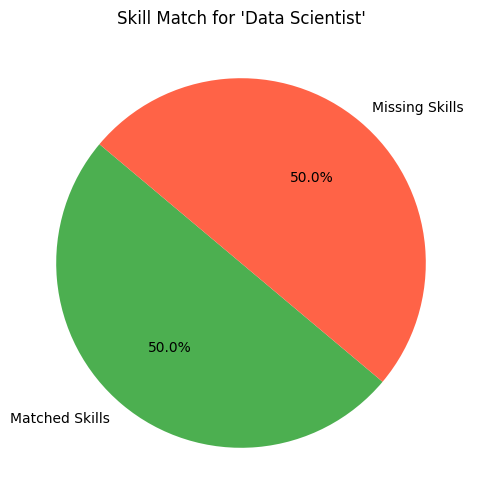

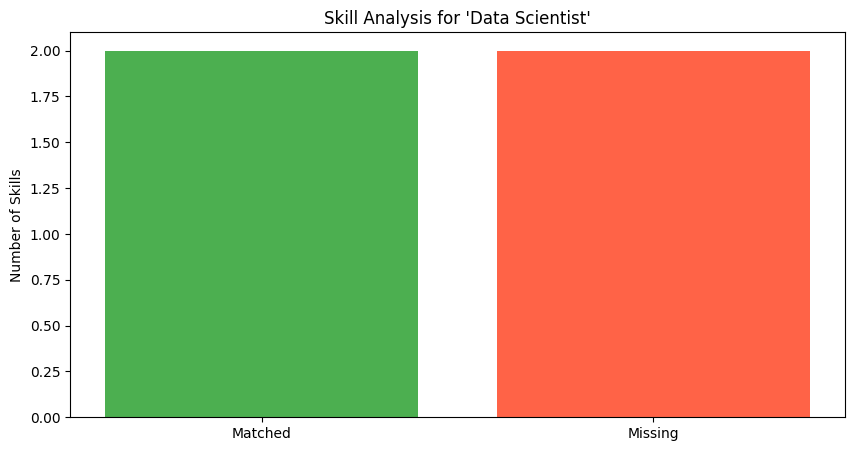

⚠️ Roadmap generation failed: name 'generate_roadmap' is not defined


In [2]:
import json
import re
import fitz  # PyMuPDF
import matplotlib.pyplot as plt
  # import your roadmap generator

# ---------------------------
# 1️⃣ Load skills data
# ---------------------------
with open("skills_data.json", "r") as f:
    skills_data = json.load(f)

required_skills_data = skills_data["required_skills"]
expanded_terms = skills_data["expanded_skill_terms"]
course_recommendations = skills_data["course_recommendations"]

# ---------------------------
# 2️⃣ Extract text from PDF
# ---------------------------
def extract_text_from_pdf(pdf_path):
    text = ""
    with fitz.open(pdf_path) as doc:
        for page in doc:
            text += page.get_text()
    return text.strip()

# ---------------------------
# 3️⃣ Extract SKILLS section
# ---------------------------
def extract_skills_section(text):
    match = re.search(r"skills\s*(.*?)(projects|experience|$)", text, re.I | re.S)
    if match:
        skills_text = match.group(1)
        skills_text = re.sub(r"[•\-–]", " ", skills_text)
        skills_text = re.sub(r"[\n\r]", " ", skills_text)
        return skills_text.strip()
    return ""

# ---------------------------
# 4️⃣ Extract individual skills
# ---------------------------
def extract_skills_from_text(text, expanded_terms):
    cleaned_text = text.lower()
    found_skills = set()
    for skill, variants in expanded_terms.items():
        for variant in variants:
            if re.search(rf"\b{re.escape(variant.lower())}\b", cleaned_text):
                found_skills.add(skill.lower())
                break
    return found_skills

# ---------------------------
# 5️⃣ Analyze resume
# ---------------------------
def analyze_resume(pdf_path, job_title, visualize=True):
    pdf_text = extract_text_from_pdf(pdf_path)
    skills_text = extract_skills_section(pdf_text)
    found_skills = extract_skills_from_text(skills_text, expanded_terms)

    # Job-specific skills
    if job_title not in required_skills_data:
        print(f"⚠️ Job title '{job_title}' not found in skills_data.json.")
        return

    job_skills = set(skill.lower() for skill in required_skills_data[job_title])
    matched_skills = found_skills & job_skills
    missing_skills = job_skills - found_skills
    coverage = (len(matched_skills) / len(job_skills)) * 100 if job_skills else 0

    # Print results
    print("\n--- Extracted Skills ---\n")
    print(skills_text or "No skills section found in resume.")

    print(f"\n✅ Skills Matched ({len(matched_skills)}): {', '.join(matched_skills) or 'None'}")
    print(f"❌ Missing Skills ({len(missing_skills)}): {', '.join(missing_skills) or 'None'}")
    print(f"\n📊 Skill Coverage: {coverage:.2f}%")

    print("\n📚 Recommended Courses for Missing Skills:")
    for skill in missing_skills:
        course = course_recommendations.get(skill.capitalize(), "No course found")
        print(f"- {skill}: {course}")

    # Optional: visualization
    if visualize:
        labels = ["Matched Skills", "Missing Skills"]
        sizes = [len(matched_skills), len(missing_skills)]
        colors = ["#4CAF50", "#FF6347"]
        plt.figure(figsize=(6, 6))
        plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
        plt.title(f"Skill Match for '{job_title}'")
        plt.show()

        # Bar chart for quick skill count
        plt.figure(figsize=(10, 5))
        plt.bar(["Matched", "Missing"], [len(matched_skills), len(missing_skills)], color=colors)
        plt.title(f"Skill Analysis for '{job_title}'")
        plt.ylabel("Number of Skills")
        plt.show()

    # Generate roadmap
    gap_summary = f"Matched skills: {', '.join(matched_skills)}. Missing skills: {', '.join(missing_skills)}."
    try:
        roadmap = generate_roadmap(job_title, gap_summary)
        print("\n--- Personalized Roadmap ---\n")
        print(roadmap)
    except Exception as e:
        print(f"⚠️ Roadmap generation failed: {e}")

# ---------------------------
# 6️⃣ User Input
# ---------------------------
if __name__ == "__main__":
    pdf_file = input("Enter the PDF file path (e.g., demo1.pdf): ").strip()
    job_title = input("Enter the target job title (e.g., Data Scientist): ").strip()
    analyze_resume(pdf_file, job_title)


['ID_num', 'job_title', 'Short_description', 'Skills_required', 'Industry', 'Pay_grade']
